<a href="https://colab.research.google.com/github/vardhanreddy2003/emotion-detection/blob/main/emotion_detection_using_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/sychonix/emotion/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [4]:
df["label"].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [5]:
import spacy

In [6]:
nlp=spacy.load("en_core_web_sm")

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [14]:
tokenizer=Tokenizer(oov_token="<00V>")
tokenizer.fit_on_texts(df["text"])

In [15]:
print(len(tokenizer.word_index))

15213


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df["text"],df["label"],test_size=0.3,random_state=42)

In [18]:
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)

In [19]:
max_length=max(len(seq) for seq in X_train_seq)

In [20]:
print(max_length)

66


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [23]:
X_train_pad=pad_sequences(X_train_seq,maxlen=max_length,padding="post")
X_test_pad=pad_sequences(X_test_seq,maxlen=max_length,padding="post")

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [25]:
y_train_enc=label_encoder.fit_transform(y_train)
y_test_enc=label_encoder.transform(y_test)

In [26]:
print(len(label_encoder.classes_))

6


In [27]:
!pip install -q transformers datasets tensorflow tensorflow_hub tensorflow_text scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-c

In [28]:
from transformers import TFAutoModelForSequenceClassification

In [29]:
model_name="roberta-base"
model=TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=6)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy

In [31]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(df["label"]), y=df["label"])
class_weight_dict = dict(enumerate(class_weights))

# Print computed weights
print("Class Weights:", class_weight_dict)


Class Weights: {0: np.float64(0.5715102157451064), 1: np.float64(0.49732686808404825), 2: np.float64(2.044989775051125), 3: np.float64(1.2351397251814111), 4: np.float64(1.3766993632765445), 5: np.float64(4.662004662004662)}


In [32]:
model.compile(optimizer="adam",loss=SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [33]:
history=model.fit(X_train_pad,y_train_enc,validation_data=(X_test_pad,y_test_enc),epochs=10,batch_size=20,class_weight=class_weight_dict)

Epoch 1/10
560/560 [==============================] - 225s 321ms/step - loss: 1.6307 - accuracy: 0.3196 - val_loss: 1.5906 - val_accuracy: 0.3294
Epoch 2/10
560/560 [==============================] - 199s 356ms/step - loss: 1.6024 - accuracy: 0.3254 - val_loss: 1.5821 - val_accuracy: 0.3294
Epoch 3/10
560/560 [==============================] - 200s 357ms/step - loss: 1.6012 - accuracy: 0.3265 - val_loss: 1.6107 - val_accuracy: 0.3294
Epoch 4/10
560/560 [==============================] - 200s 357ms/step - loss: 1.6013 - accuracy: 0.3291 - val_loss: 1.5903 - val_accuracy: 0.3294
Epoch 5/10
560/560 [==============================] - 200s 357ms/step - loss: 1.5981 - accuracy: 0.3245 - val_loss: 1.5884 - val_accuracy: 0.3294
Epoch 6/10
560/560 [==============================] - 200s 357ms/step - loss: 1.5991 - accuracy: 0.3306 - val_loss: 1.5864 - val_accuracy: 0.3294
Epoch 7/10
560/560 [==============================] - 200s 356ms/step - loss: 1.5941 - accuracy: 0.3315 - val_loss: 1.5846 -

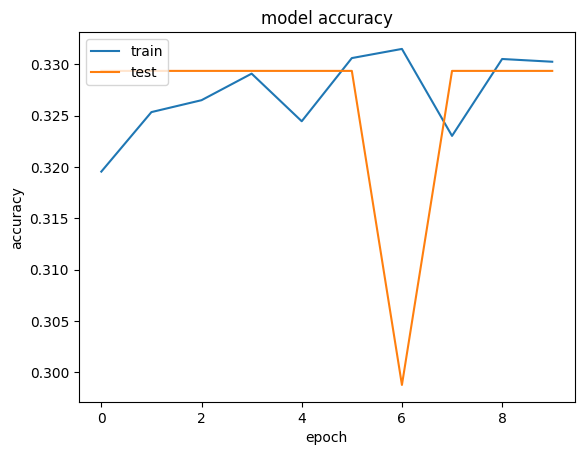

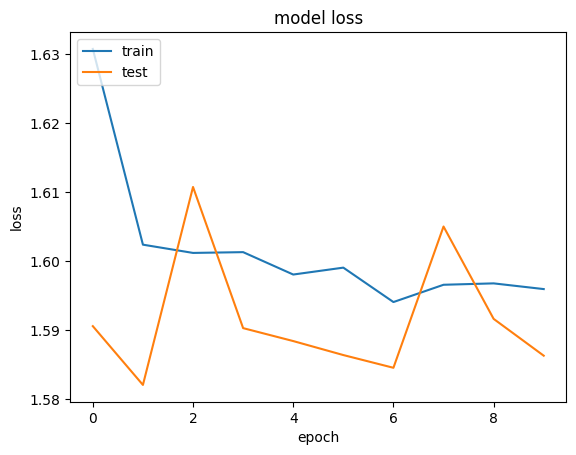

In [35]:


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
